## This notebook shows how the collision operator is tested
### Last modified July 1, 2020
### Authored by: AJ

In [1]:
import numpy as np
np.set_printoptions(precision=3)
from matplotlib import pyplot as plt
from tests import test_lb
from vlapy.core import lenard_bernstein
from tqdm import tqdm

if test_lb.test_lenard_bernstein_maxwellian_solution() is None:
    print ("Maxwellian Solution: Success!")
    
if test_lb.test_lenard_bernstein_energy_conservation() is None:
    print ("Energy Conservation: Success!")
    
if test_lb.test_lenard_bernstein_density_conservation() is None:
    print ("Density/Charge Conservation: Success!")    
    
if test_lb.test_lenard_bernstein_velocity_zero() is None:
    print ("Zero Average Velocity as t-> inf: Success")

Maxwellian Solution: Success!
Energy Conservation: Success!
Density/Charge Conservation: Success!
Zero Average Velocity as t-> inf: Success


### Let's go through these tests step-by-step
#### Testing if a Maxwellian Distribution is the steady state solution to this system

Text(0.5, 0.98, 'Testing if the Maxwellian is a steady-state solution of the implementation of the collision operator')

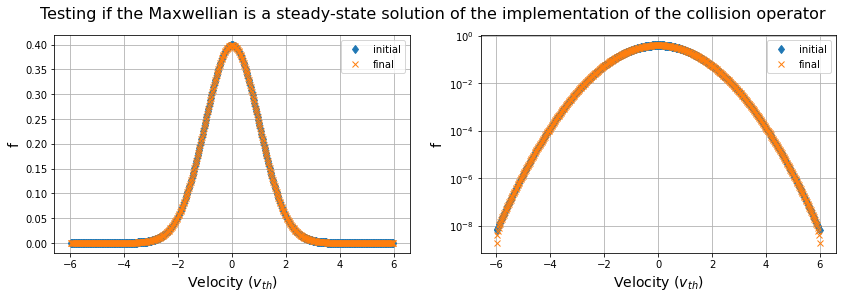

In [2]:
## Set up the grid
vmax = 6.0
nv = 512
dv = 2 * vmax / nv
v = np.linspace(-vmax + dv / 2.0, vmax - dv / 2.0, nv)

# parameters for time evolution
nu = 1e-3
dt = 0.1
v0 = 1.0

# collision operator matrix
leftside = lenard_bernstein.make_philharmonic_matrix(v, nv, nu, dt, dv, v0)

# initial distribution function is a Maxwellian
f = np.exp(-(v ** 2.0) / 2.0 / v0) / np.sum(np.exp(-(v ** 2.0) / 2.0 / v0) * dv)
f_out = f.copy()

# iterate for 32 timesteps
for it in range(32):
    f_out = lenard_bernstein.take_collision_step(leftside, f_out)

# test that the initial and final distribution functions are equal
np.testing.assert_almost_equal(f, f_out, decimal=4)


# Visualize
fig = plt.figure(figsize=(14,4))
mxplt = fig.add_subplot(121)
mxplt.plot(v, f, "d", label="initial")
mxplt.plot(v, f_out, "x", label="final")
mxplt.grid()
mxplt.set_xlabel("Velocity ($v_{th}$)", fontsize=14)
mxplt.set_ylabel("f", fontsize=14)
mxplt.legend()

lgmxplt = fig.add_subplot(122)
lgmxplt.semilogy(v, f, "d", label="initial")
lgmxplt.semilogy(v, f_out, "x", label="final")
lgmxplt.grid()
lgmxplt.set_xlabel("Velocity ($v_{th}$)", fontsize=14)
lgmxplt.set_ylabel("f", fontsize=14)
lgmxplt.legend()

fig.suptitle("Testing if the Maxwellian is a steady-state solution of the implementation of the collision operator", fontsize=16)

#### Next we test the energy conservation of the implementation of the collision operator for a typical set of collision rate and timescale.

In [3]:
nu = 1e-4
dt = 0.1
v0 = 1.0

leftside = lenard_bernstein.make_philharmonic_matrix(v, nv, nu, dt, dv, v0)

f = np.exp(-((v) ** 2.0) / 2.0 / v0)*(1+0.05*np.cos(64*np.pi/12*v))
f = f / np.sum(f * dv)

nt = 10000

# f_out = np.zeros((nt, nv))
# f_out[0] = f.copy()

f_out = f.copy()

for it in tqdm(range(1,nt)):
    f_out = lenard_bernstein.take_collision_step(leftside, f_out)

temp_in = np.sum(f) * dv
temp_out = np.sum(f_out) * dv

print ("Density conservation error = " + str(temp_in - temp_out))
np.testing.assert_almost_equal(temp_out, temp_in, decimal=6)

temp_in = np.sum(f * v) * dv
temp_out = np.sum(f_out * v) * dv

print ("Momentum conservation error = " + str(temp_in - temp_out))
np.testing.assert_almost_equal(temp_out, temp_in, decimal=6)

temp_in = np.sum(f * v ** 2.0) * dv
temp_out = np.sum(f_out * v ** 2.0) * dv

print ("Energy conservation error = " + str(temp_in - temp_out))
np.testing.assert_almost_equal(temp_out, temp_in, decimal=6)

# Visualize
# fig = plt.figure(figsize=(14,4))
# mxplt = fig.add_subplot(121)
# mxplt.plot(v, f[192:-192], "d", label="initial")
# mxplt.plot(v, f_out[192:-192], "x", label="final")
# mxplt.grid()
# mxplt.set_xlabel("Velocity ($v_{th}$)", fontsize=14)
# mxplt.set_ylabel("f", fontsize=14)
# mxplt.legend()

# lgmxplt = fig.add_subplot(122)
# lgmxplt.semilogy(v[192:-192], f[192:-192], "d", label="initial")
# lgmxplt.semilogy(v[192:-192], f_out[192:-192], "x", label="final")
# lgmxplt.grid()
# lgmxplt.set_xlabel("Velocity ($v_{th}$)", fontsize=14)
# lgmxplt.set_ylabel("f", fontsize=14)
# lgmxplt.legend()


# fig.suptitle("Testing if the Maxwellian is a steady-state solution of the implementation of the collision operator", fontsize=16)

100%|██████████| 9999/9999 [00:30<00:00, 333.10it/s]

Density conservation error = 8.313770005763388e-09
Momentum conservation error = 2.3148150063434514e-14
Energy conservation error = 2.5656691793329855e-07


Text(0.5, 0.98, 'Testing for density, momentum, and energy conservation')

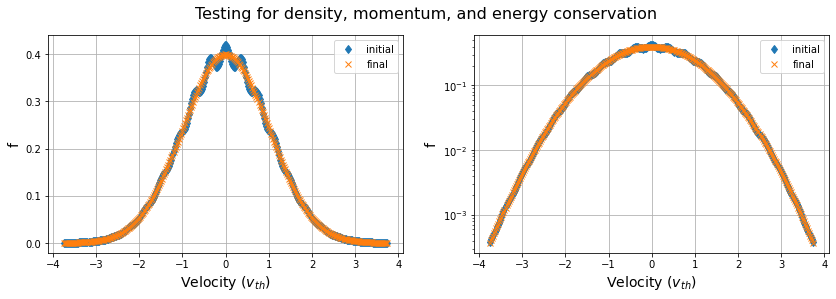

In [10]:
pltint = 96

# Visualize
fig = plt.figure(figsize=(14,4))
mxplt = fig.add_subplot(121)
mxplt.plot(v[pltint:-pltint], f[pltint:-pltint], "d", label="initial")
# mxplt.plot(v[pltint:-pltint], f_out[pltint:-pltint], "x", label="middle")
mxplt.plot(v[pltint:-pltint], f_out[pltint:-pltint], "x", label="final")
mxplt.grid()
mxplt.set_xlabel("Velocity ($v_{th}$)", fontsize=14)
mxplt.set_ylabel("f", fontsize=14)
mxplt.legend()

lgmxplt = fig.add_subplot(122)
lgmxplt.semilogy(v[pltint:-pltint], f[pltint:-pltint], "d", label="initial")
lgmxplt.semilogy(v[pltint:-pltint], f_out[pltint:-pltint], "x", label="final")
lgmxplt.grid()
lgmxplt.set_xlabel("Velocity ($v_{th}$)", fontsize=14)
lgmxplt.set_ylabel("f", fontsize=14)
lgmxplt.legend()


fig.suptitle("Testing for density, momentum, and energy conservation", fontsize=16)